# Project 3 - Crossmatching astronomical catalogues

**Project deadline:** This project is due for submission on Thursday, 19.06.2025 at 23:55.

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you *four* projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted via [eCampus](https://ecampus.uni-bonn.de/goto_ecampus_exc_3753493.html). The submission consists of a completed version of this notebook.
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

Astronomical observations in optical wavelengths are performed with CCD-cameras mounted on optical telescopes. The following figure shows two observations of the same patch of the sky. The data were taken in 2007 at our old observatory [Hoher List](https://www.hoher-list.de/).

<img src="figs/dithered_images.png" width="700" height="700" />

The objects in black are stars. These sources can be extracted from the images and analysed for their appearance, their brightness and many other quantities. Please see the Notebook `scipy_optical_object_detection.ipynb` within the github-repository [Thomas Erben - Python Cheat Sheets](https://github.com/terben/Python-cheat-sheets) if you are interested how such analyses can be performed with Python. We already covered all necessary topics in our course!

You note that the two images show approximately the same patch of the sky but also that they are shifted with respect to each other. You can spot three prominent sources in the upper part of the left figure which are located closer to the center on the right.

Although we *should* know what the shift between different astronomical exposures is (we ask the telescope to point to a certain position of the sky), this information is subject to errors and inaccuracies - mostly due to pointing problems of the telescope.

To compare properties of the same source in different exposures - for instance to investigate whether a star is variable, it is essential to determine *precise* shifts between such exposures. To implement an algorithm for this task is the topic of this project.

## Our Algorithm to crossmatch astronomical catalogs

Starting point for our project are the six object catalogs `image013269.asc .. image013274.asc` from consecutive observations of the same patch of the sky within the `data` subdirectory. The catalogs are text files having two columns: The $x$ and $y$ positions of detected sources in their respective CCD-images.

In [131]:
!head data/image013269.asc

44.5027 28.2661
191.230 215.587
150.108 259.954
204.017 290.501
608.995 296.005
561.983 322.495
731.254 373.325
436.115 361.365
87.2245 409.041
699.004 416.995


The following image shows detected sources in the images `image013269.asc` and `image013271.asc`.

<img src="figs/detected_objects.png" width="700" height="700" />

Can you spot that those catalogues originate from the same sky-area but are shifted against each other? 
Given those source lists, we want to implement an algorithm to automatically determine offsets between the exposures in $x-$ and $y$-directions.

**Notes:**
1. You might argue that an $x-$ and $y-$shift cannot be the whole story because astronomical observations are done on *a sphere* and not on a two-dimensional plane. This is correct and for large-format cameras, we need to take into account spherical geometry. However, in our case, the field-of-view is so small that we can neglect the effects of a sphere and the plane approximation is good enough.

2. We realise that objects present in one image might not be present in the other one. This can have several reasons: (1) edge effects; (2) a CCD might have bad pixels within an object; (3) some detections are CCD artefacts and not of astronomical origin.

A possible algorithm to estimate a linear shift between two-dimensional point clouds
that share the same pattern (object configuration) is the following:

1. We calculate the $x$- and $y$-distances from all objects in one catalogue
   with respect to *all objects* in the other catalogue:
   
   An example with two fake catalogues:
   - Catalogue 1 has objects at (1, 1), (3, 1), (3, 3), (1, 3), (2, 2), (7, 2), (-1, 2)
   - Catalogue 2 has objects at (4, 4), (6, 4), (6, 6), (4, 6), (5, 5), (1, 3), 10, 6)
   
    The common pattern in the catalogues is a $2\times 2$ square
    with a point in the middle and each catalogue contains two
    points not present in the counterpart.
    
    If we calculate the x distances for point 1 of catalogue 1
    with all objects from catalogue 2 we obtain the array:

    1 - 4, 1 - 6, 1 - 6, 1 - 4, 1 - 5, 1 - 1, 1 - 10
   
    We obtain for point 2:

    3 - 4, 3 - 6, 3 - 6, 3 - 4, 3 - 5, 3 - 1, 3 - 10
    
    The same we do for *all other* points and also for the
    $y$-distances. We store those $x-$ and $y-$distances in two arrays.
    
2.  We analyse the frequency of the distances in histograms.
    We realise that the offsets between the
    catalogues can be found in the histogram bins (for $x$ and $y$
    separately) that contain most counts.   

## Task 1

Please do all the tasks at the end of this notebook. You will finally submit the completed notebook.

To test your understanding of the algorithm, please answer the following questions in a markdown cell:

1. What are good and what are bad object patterns for this algorithm
   to work well. Why do you think that the algorithm is especially suited for astronomical data?
   
   **Hint:**
   Assume that your main pattern is a straight line of equidistant points. What issue do you have in this case?
   
2.  I wrote above 'The offset between the catalogues can be found
    at the histogram bins (for $x-$ and $y-$ separately) that contain
    most counts.'. Why do we need a histogram analysis? Can't we just
    get all the distances as described above and check which value (distance) occurs most often?

3. Assume that we can estimate object positions with an accuracy of up to one CCD pixel. Which histogram bin size would you choose for your analysis and why?

## Task 2

Write a Python program to implement the algorithm above and to estimate the $x-$ and $y-$offsets between the object patterns in catalogues [data/image013269.asc](data/image013269.asc) and [data/image013271.asc](data/image013271.asc). Your program should plot the two histograms of the $x-$ and $y-$ distances and print the estimated offsets.

**Hints:**
1. First, read the data and store the $x-$ and $y-$ coordinates from each image in one-dimensional arrays. To obtain from those two arrays all distances between the two catalogues is a *one-line* numpy-operation for each of the $x-$ and $y-$coordinates. If you have the distances written in a two-dimensional matrix, you can convert it to a one-dimensional array with the `np.flatten` command.

2. To analyse the histograms for the maximum-count bins and to estimate the distances, see the last task from the lecture 06 review questions. Up to what accuracy can you determine the shifts with this method?

3. For this and later tasks, I found the function `enumerate` very useful to write more compact programs. Just have a look at the documentation but do not feel obliged to use it.

## Task 3

We have six catalogues and we want to estimate shifts between *all* of them. Having the algorithm for pairwise shifts (Task 2), one could estimate shifts between three catalogues `c_1.asc`, `c_2.asc` and `c_3.asc` in the following two ways:
1. Obtain with Task 2 the distances between `c_1.asc` and `c_3.asc`. This be $d_{13}$. Similarily, the distance between `c_1.asc` and `c_2.asc` with Task 2 be $d_{12}$. Then the distance between `c_2.asc` and `c_3.asc` must be $d_{23} = d_{21} - d_{31}$.
2. Perform the same steps as in (1.) but estimate $d_{23}$ with Task 2 as well.

Perform this analysis for several combinations of the catalogues `image013269.asc .. image013274.asc`. What do you observe? If you obtain different results for $d_{23}$ with both methods, why is this the case?

## Task 4

Task 3 should show you that a pure pairwise analysis to obtain consistent offset values between more than two catalogues is not optimal. In this task, we want to estimate the shifts taking into account all available data points simultaneously.

We want to proceed as follows:

Using the algorithm of Task 2, we obtain estimates $d_{ij}$ for *all* pairs of distances between all involved catalogues. We write the $d_{ij}$ as follows:

$$
\begin{eqnarray}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{14} & = s_{1} - s_{4} + e_{14}\\
  \vdots \\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  d_{24} & = s_{2} - s_{4} + e_{24}\\
  \vdots \\
  \label{eq:lsq} \tag{1}
\end{eqnarray}
$$

The $s_{i}$ is a shift to be applied to image $i$ (separately for $x$ and $y$) and the $e_{ij}$ are (unknown) errors of the $d_{ij}s$.
The goal is to obtain values for the $s_{i}$ that satisfy *all* equations of (1) simultanesously *as good as possible*. 

### Subtask 4.1
Please make clear to yourself that estimating the $s_{i}s$ can be formulated as a classical *Linear Least Squares Problem*; see also the next subtask. You already solved many of those in your Lab experiments or/and you learned about it in your math courses. You have measurements $d_{ij}$ with (not exactly known) errors and many equations for the unknowns $s_{i}$.

To show you better that you already know this sort of problem: A classical physics experiment is to estimate velocoty and starting point of a car undergoing a uniform motion, i.e. to estimate parameters of the relation $s=v\cdot t + s_0$. You typically have many mesurements of $t$ and $s$ (with errors) and you estimate $v$ and $s_0$ with a *fit* (a Linear Least-Squares problem!). Our task at hand is very similar!

Please discuss, why the system (1) above cannot be solved uniquely in the *Least-Squares sense*. To be able to do so, you need to add another equation to the system. There are many possibilities to do so. Just write down why you make a certain choice.

If you have difficulties with this task at this stage, come back to it after the next subtask.

### Subtask 4.2
For clarity, we discuss the general case of the equation system $(1)$ above in the special case of three catalogues. In that case, the three equations:
$$
\begin{eqnarray*}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  \label{eq:three_cat} \tag{2}
\end{eqnarray*}
$$
can be written in matrix form $Ax - b = e$ with:
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
s_{1} \\
s_{2} \\
s_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{3}
$$

The Least-Squares technique (or a data-fit) now chooses the $x$ (or the $s_{i}s$) which minimise the Euclidean norm of $e$:
$$
\text{min}\; ||e||_{2}^{2} = \text{min}\; ||Ax - b||_{2}^{2},
$$
where $||\cdot ||$ is the euclidean norm.

The solution to this problem is given by the *normal equations*:
$$
(A^T A) x = A^T b.
\label{eq:normal_eq} \tag{4}
$$

This is a system of *ordinary linear equations* which you know very well from Linear Algebra. 
Write down the matrix $A^T A$ for the case of eq. (2) and show that it is a singular matrix. This is the mathematical reason for the argument that you provided in subtask 4.1. Add your choice of an additional equation to the system of (2) and show that (4) now will give a unique solution to the problem.

### Subtask 4.3

Implement the algorithm of subtask 4.2 to solve the offset problem for the six catalogues `image013269.asc .. image013274.asc`. Your program needs to handle the genral case when an arbitrary amount of catalogues ($\geq 2$) is put into that list, i.e. your program should not work only for the special case of six catalogues. Finally, create a scatter showing the offset pattern for the six observations.

**Hints:** (1) Note that you have to solve a system of equations (2) for each of the $x-$ and $y-$coordinates; (2) How many equations do you need if you have $n$ catalogues?; (3) You can use loops to obtain the $d_{ij}s$ and to build up matrix $A$ and vector $b$; (4) You do not need to plot all the histograms - you should do so in the beginning to test your program though. Have a look at the `numpy.histogram` function. It is equivalent to `plt.histogram` but it does not plot the histogram. (5) Have a look at the `numpy.linalg.lstsq` function. You can directly feed into that function the matrix $A$ and the vector $b$ from eq. (3). There is no need for you to explicitely build and solve the normal equations from eq. (4).

In [132]:
# Load necessary packages 
%matplotlib inline
import numpy as np 
from matplotlib import pyplot as plt 
import glob
import itertools

## Task 1
### Question 1:

Good Patterns:
- Geometrically distinct and non-degenerate configurations (e.g., non-collinear points, non-symmetric structures)
- Patterns with unique pairwise distances, so the same relative configuration isn’t easily confused with others.
- Densely populated patterns (more points → more matches → clearer histogram peak).
- Patterns preserved across catalogues (e.g., same object set, just shifted).

Bad patterns:
- Collinear or regularly spaced points (like a straight line of equidistant points):
    - All pairwise distances are similar → ambiguous distance histograms.
- Highly symmetric shapes (e.g., perfect grids or circles):
    - Too many repeated distances → histogram peaks may be smeared or duplicated.
- Too few shared points or too much noise/outliers.

Why this is good for astronomy:
- Astronomical catalogues often contain rigid sky configurations (e.g., star clusters, galaxies).
- These patterns don’t change much, just shift due to different observations, making this method reliable.

### Question 2:

Real data is noisy → exact distances will rarely match perfectly due to:
- Measurement errors, Pixel quantization, Instrumental distortions 

Therefore histograms are crucial, since the tolerate small deviations due to the binning 

### Question 3:
You should use a bin size of 1.0 pixel.

Why:
- Since your target precision is 1 CCD pixel, bins smaller than that would:
    - Split meaningful counts across multiple bins → weaken the signal.
- Bins larger than 1 pixel:
    - Might blur the peak and reduce accuracy.


## Task 2

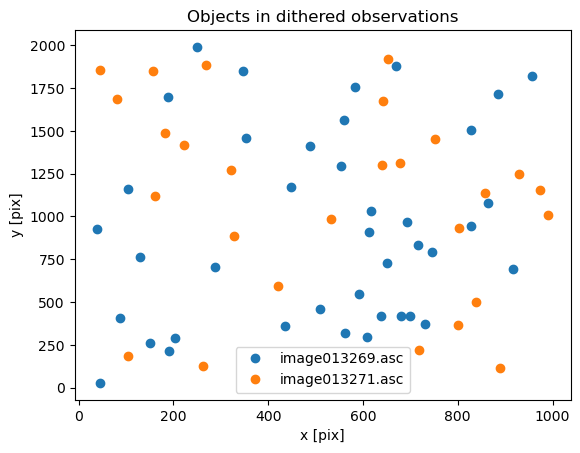

In [133]:
# load the 2 specified images 
x1,y1 = np.genfromtxt('data/image013269.asc', unpack=True)
x2,y2 = np.genfromtxt('data/image013271.asc', unpack=True)

# plot the two images to get a feeling for the shifts
plt.plot(x1,y1, 'o',label='image013269.asc')
plt.plot(x2,y2, 'o',label='image013271.asc')
plt.legend()
plt.xlabel('x [pix]')
plt.ylabel('y [pix]')
plt.title('Objects in dithered observations')
plt.show()

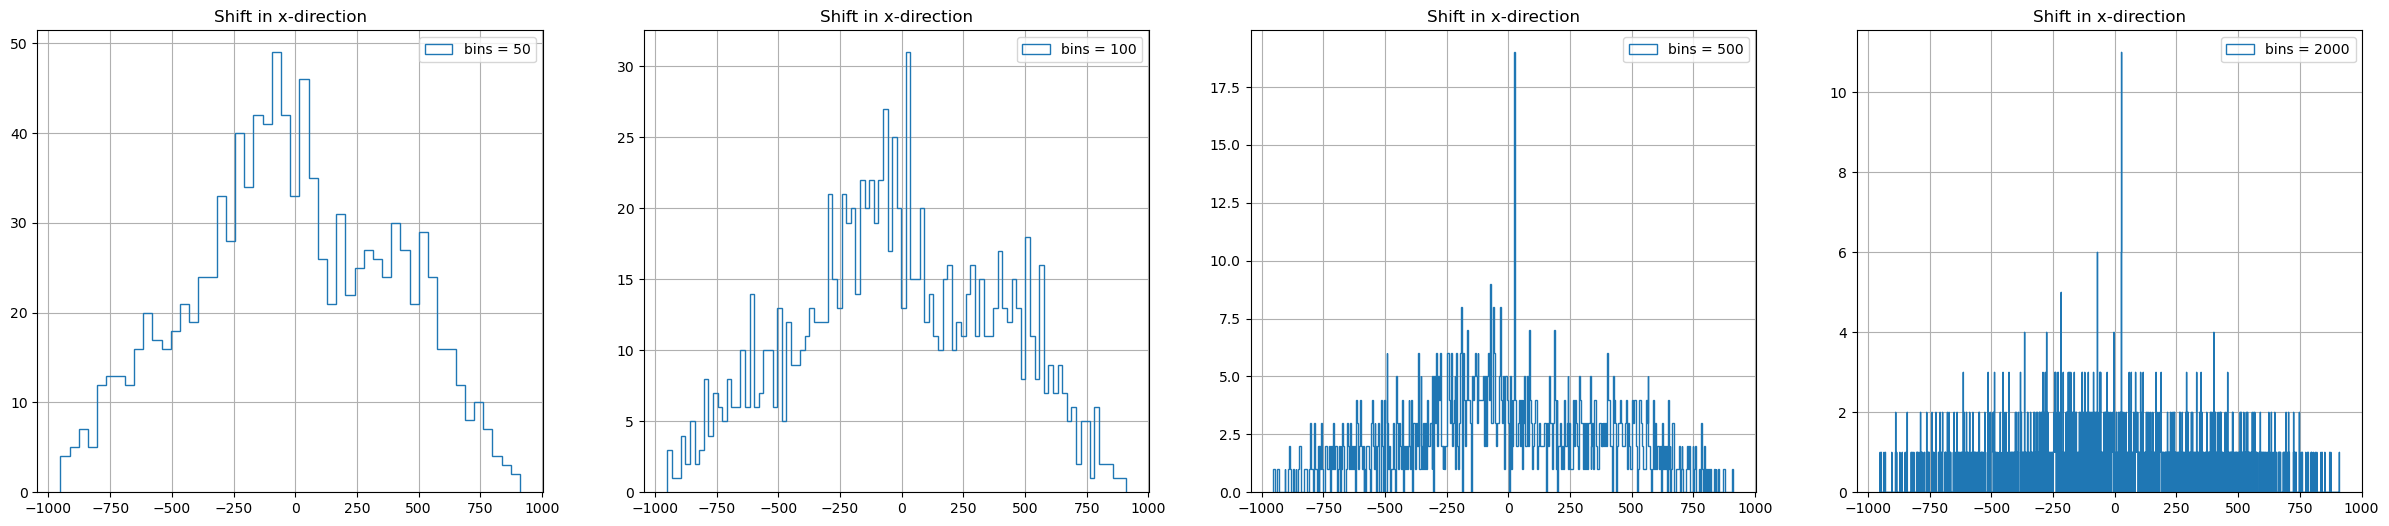

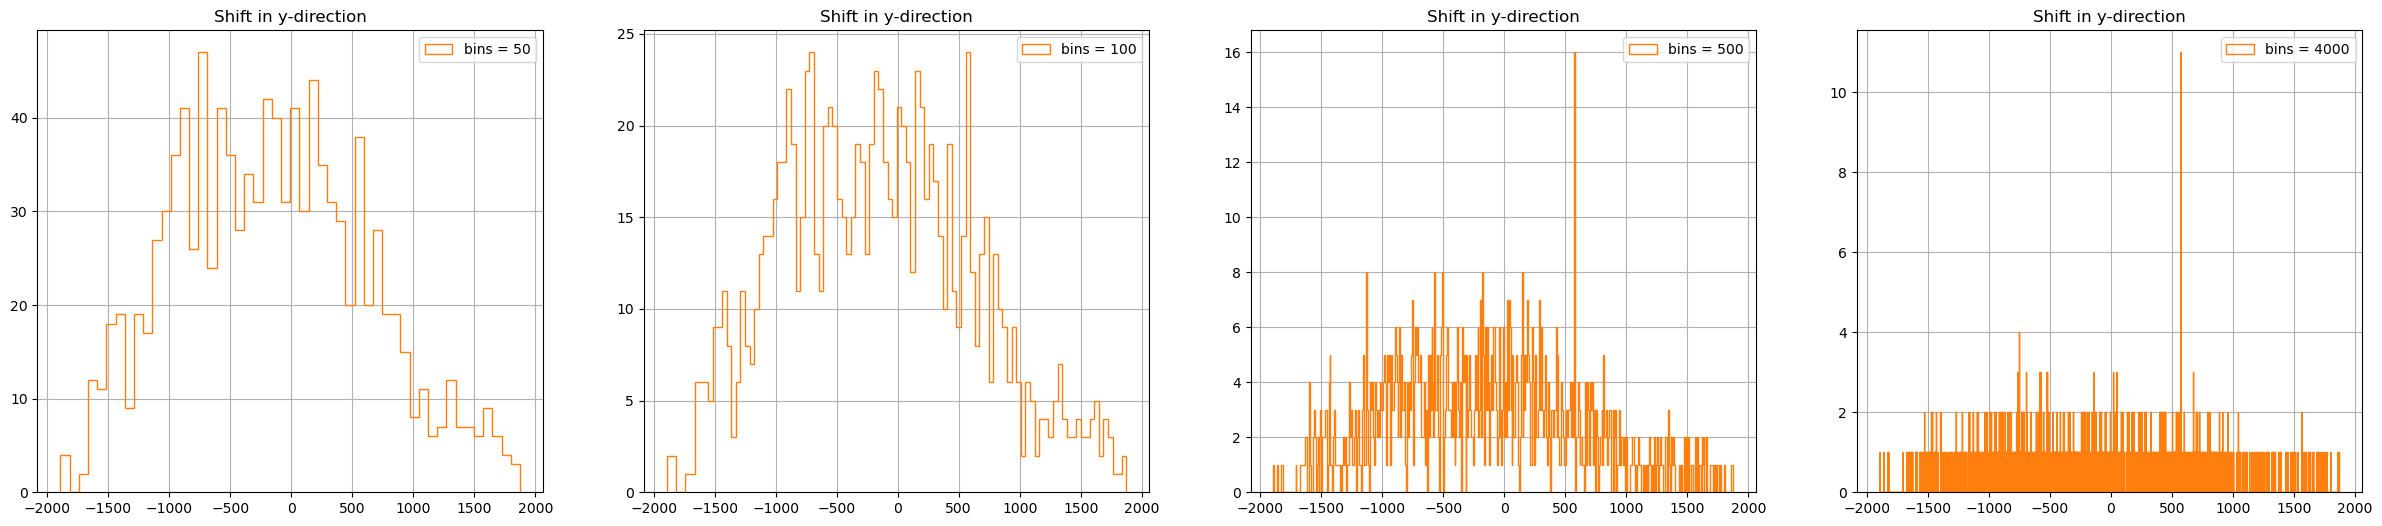

In [134]:
# calculate the differences between each x and y value from the first to all other x and y values from the second image
diffx = x1[:, np.newaxis] - x2
diffy = y1[:, np.newaxis] - y2

# flatten the result for the histogram
x_distances = np.ndarray.flatten(diffx)
y_distances = np.ndarray.flatten(diffy)

# create histogram for the x and the y distances for different amount of bins in a subplot each
# subplot for the x shit
fig, ax = plt.subplots(1,4, figsize=(30,6))
x_counts_50, x_bins_50, x_patches_50 = ax[0].hist(x_distances, bins=50, histtype='step', label='bins = 50')
x_counts_100, x_bins_100, x_patches_100 = ax[1].hist(x_distances, bins=100, histtype='step', label='bins = 100')
x_counts_500, x_bins_500, x_patches_500 = ax[2].hist(x_distances, bins=500, histtype='step', label='bins = 500')
x_counts, x_bins, x_patches = ax[3].hist(x_distances, bins=2000, histtype='step', label='bins = 2000')

# create legends, titles, and grid
for ax in ax:
    ax.legend()
    ax.set_title('Shift in x-direction')
    ax.grid()

# subplot for the y shit
fig, ax = plt.subplots(1,4, figsize=(30,6))
y_counts_50, y_bins_50, y_patches_50 = ax[0].hist(y_distances, bins=50, color='tab:orange' ,histtype='step', label='bins = 50')
y_counts_100, y_bins_100, y_patches_100 = ax[1].hist(y_distances, bins=100, color='tab:orange' ,histtype='step', label='bins = 100')
y_counts_500, y_bins_500, y_patches_500 = ax[2].hist(y_distances, bins=500, color='tab:orange' ,histtype='step', label='bins = 500')
y_counts, y_bins, y_patches = ax[3].hist(y_distances, bins=4000, color='tab:orange' ,histtype='step', label='bins = 4000')

# create legends, titles, and grid
for ax in ax:
    ax.legend()
    ax.set_title('Shift in y-direction')
    ax.grid()

### Observations:
When looking at the histograms, it becomes visible that for $n_{bins} >= 500$ there is a bin which dominates the histogram. For less numbers of bins, there is no clear outlying bin, since the bins are too large and therefore the accuracy is not high. Therefore $n_{bins, x} = 2000$ and $n_{bins, y} = 4000$ are chosen for the reasons explained in Task 1. Mainly that there needs to be a bin for every pixel, and since the histogram displays positive and negative shifts, the amount of bins have to be double the amount of pixels, so that the differences in two bins next to each other corresponds to a shift of 1 pixel.

The shift between the two images in x-direction is most likely 27.607 pixels, the shift in y-direction is most likely 576.009 pixels
The shift accuracy for x- and y-direction are 0.931 and 0.941 pixels
When looking at the plot, the estimation of the x- and y-shift appears to be successful


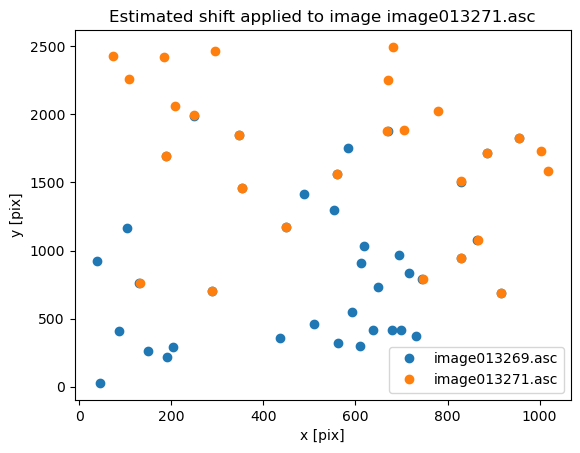

In [135]:
# extract the bin with the most values
x_max_bin = np.argmax(x_counts)
y_max_bin = np.argmax(y_counts)

# get the amount of values in that bin
x_max_value = x_counts[x_max_bin]
y_max_value = y_counts[y_max_bin]

# get the most probable value for the shift
x_shift =  0.5 * (x_bins[x_max_bin] + x_bins[x_max_bin+1])
y_shift =  0.5 * (y_bins[y_max_bin] + y_bins[y_max_bin+1])
 
# as well as the accuracy 
x_bin_range = (x_bins[x_max_bin], x_bins[x_max_bin+1])
y_bin_range = (y_bins[y_max_bin], y_bins[y_max_bin+1])

x_accuracy = abs(x_bins[x_max_bin] - x_bins[x_max_bin+1])
y_accuracy = abs(y_bins[y_max_bin] - y_bins[y_max_bin+1])

# print out result
print(f"The shift between the two images in x-direction is most likely {x_shift:.3f} pixels, the shift in y-direction is most likely {y_shift:.3f} pixels")
print(f"The shift accuracy for x- and y-direction are {x_accuracy:.3f} and {y_accuracy:.3f} pixels")

# The result is verified by plotting the two images again with the shift applied to the second image
plt.plot(x1,y1, 'o',label='image013269.asc')
plt.plot(x2+x_shift,y2+y_shift, 'o' ,label='image013271.asc')
plt.legend()
plt.xlabel('x [pix]')
plt.ylabel('y [pix]')
plt.title('Estimated shift applied to image image013271.asc')

print(f"When looking at the plot, the estimation of the x- and y-shift appears to be successful")

In [136]:
## write task 2 in a function to be able to use it quicker in task 3
def calc_shift(x1,y1,x2,y2):
    '''this function calculates the shift between two catalogues as described in task 2, the input are the x and y coordinates of the catalogues,
    the output is the shift in x and y direction between the two catalogues'''
    
    #calculate all x and y differences
    diffx = x1[:, np.newaxis] - x2
    diffy = y1[:, np.newaxis] - y2

    # flatten the result for the histogram
    x_distances = np.ndarray.flatten(diffx)
    y_distances = np.ndarray.flatten(diffy)

    # create histograms to get counts and bins
    x_counts, x_bins, x_patches = plt.hist(x_distances, bins=1000, histtype='step', label='bins = 2000')
    y_counts, y_bins, y_patches = plt.hist(y_distances, bins=1000, histtype='step', label='bins = 4000')
    
    # close the figure so the histogram itself is not part of the output
    plt.close()

    # extract the bin with the most values
    x_max_bin = np.argmax(x_counts)
    y_max_bin = np.argmax(y_counts)

    # get the amount of values in that bin
    x_max_value = x_counts[x_max_bin]
    y_max_value = y_counts[y_max_bin]

    # get the most probable value for the shift
    x_shift =  0.5 * (x_bins[x_max_bin] + x_bins[x_max_bin+1])
    y_shift =  0.5 * (y_bins[y_max_bin] + y_bins[y_max_bin+1])

    # return x and y shift rounded to 3 decimal places
    return np.array([round(x_shift,3), round(y_shift,3)])

## Task 3

In [137]:
# load all images into a list, where each entry is a numpy array containing the x- or values of one image 
datapath = "data/image*"
filelist = np.sort(glob.glob(datapath))

x_coordinates = []
y_coordinates = []
for files in filelist:
    x, y = np.genfromtxt(files, unpack=True)
    x_coordinates.append(x)
    y_coordinates.append(y)

In [138]:
# calculate shift between catalogues 1 and 2 as well as 1 and 3
d_12 = calc_shift(x_coordinates[0],y_coordinates[0],x_coordinates[1],y_coordinates[1])
d_13 = calc_shift(x_coordinates[0],y_coordinates[0],x_coordinates[2],y_coordinates[2])

# calculate d_23 using the result of the previous results 
d_23_task3 = d_13 - d_12
d_23_task2 = calc_shift(x_coordinates[1],y_coordinates[1],x_coordinates[2],y_coordinates[2])

difference23 = d_23_task3 - d_23_task2
print(f"The difference of d_23 calculated with the algorithm from Task 2 compared to the one from Task 3 is {difference23[0]:.3f} pixels in x- and {difference23[1]:.3f} pixels in y-direction ")

The difference of d_23 calculated with the algorithm from Task 2 compared to the one from Task 3 is 0.108 pixels in x- and 1.986 pixels in y-direction 


In [139]:
# write this shift in difference into a function and use it for different set of catalogues

def shift_difference(x_ref,y_ref,x1,y1,x2,y2):
    ''' this function calculates the difference in shift between two catalogues directly using the algorithm from task 2
    and compares it to the shift calculated with the pairwise analysis from task 3''' 
    
    # calculate shits from both catalogues to the reference catalogue
    d_1ref = calc_shift(x_ref,y_ref,x1,y1)
    d_2ref = calc_shift(x_ref,y_ref,x2,y2)
    
    # calculate the shift between the catalogues using the algorithms from task 2 and 3
    d_12_task3 = d_2ref - d_1ref
    d_12_task2 = calc_shift(x1,y1,x2,y2)

    # calculate and return the differnce
    difference = d_12_task3 - d_12_task2

    return difference


## Use this function for several combinations of catalogues 
# catalogues 3 and 4 using using 1 as reference 
d_34 = shift_difference(x_coordinates[0],y_coordinates[0],x_coordinates[2],y_coordinates[2],x_coordinates[3],y_coordinates[3])
print(f"The difference of d_34 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_34[0]:.3f} pixels in x- and {d_34[1]:.3f} pixels in y-direction ")

# catalogues 2 and 4 using using 1 as reference 
d_24 = shift_difference(x_coordinates[0],y_coordinates[0],x_coordinates[1],y_coordinates[1],x_coordinates[3],y_coordinates[3])
print(f"The difference of d_24 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_24[0]:.3f} pixels in x- and {d_24[1]:.3f} pixels in y-direction ")

# catalogues 3 and 6 using using 2 as reference 
d_36 = shift_difference(x_coordinates[1],y_coordinates[1],x_coordinates[2],y_coordinates[2],x_coordinates[5],y_coordinates[5])
print(f"The difference of d_36 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_36[0]:.3f} pixels in x- and {d_36[1]:.3f} pixels in y-direction ")

# catalogues 4 and 6 using using 1 as reference 
d_46 = shift_difference(x_coordinates[0],y_coordinates[0],x_coordinates[3],y_coordinates[3],x_coordinates[5],y_coordinates[5])
print(f"The difference of d_46 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_46[0]:.3f} pixels in x- and {d_46[1]:.3f} pixels in y-direction ")

# catalogues 1 and 5 using using 3 as reference
d_15 = shift_difference(x_coordinates[2],y_coordinates[2],x_coordinates[0],y_coordinates[0],x_coordinates[4],y_coordinates[4])
print(f"The difference of d_15 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_15[0]:.3f} pixels in x- and {d_15[1]:.3f} pixels in y-direction ")

# catalogues 1 and 4 using using 2 as reference
d_14 = shift_difference(x_coordinates[1],y_coordinates[1],x_coordinates[0],y_coordinates[0],x_coordinates[3],y_coordinates[3])
print(f"The difference of d_14 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_14[0]:.3f} pixels in x- and {d_14[1]:.3f} pixels in y-direction ")

# catalogues 5 and 6 using using 1 as reference 
d_56 = shift_difference(x_coordinates[0],y_coordinates[0],x_coordinates[4],y_coordinates[4],x_coordinates[5],y_coordinates[5])
print(f"The difference of d_56 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_56[0]:.3f} pixels in x- and {d_56[1]:.3f} pixels in y-direction ")

# catalogues 4 and 5 using using 1 as reference 
d_45 = shift_difference(x_coordinates[0],y_coordinates[0],x_coordinates[3],y_coordinates[3],x_coordinates[4],y_coordinates[4])
print(f"The difference of d_45 calculated with the algorithm from Task 2 compared to the one from Task 3 is {d_45[0]:.3f} pixels in x- and {d_45[1]:.3f} pixels in y-direction ")


The difference of d_34 calculated with the algorithm from Task 2 compared to the one from Task 3 is 0.905 pixels in x- and 1.628 pixels in y-direction 
The difference of d_24 calculated with the algorithm from Task 2 compared to the one from Task 3 is 0.912 pixels in x- and 1.831 pixels in y-direction 
The difference of d_36 calculated with the algorithm from Task 2 compared to the one from Task 3 is -0.924 pixels in x- and 4.816 pixels in y-direction 
The difference of d_46 calculated with the algorithm from Task 2 compared to the one from Task 3 is -0.905 pixels in x- and -4.039 pixels in y-direction 
The difference of d_15 calculated with the algorithm from Task 2 compared to the one from Task 3 is 0.921 pixels in x- and 1.697 pixels in y-direction 
The difference of d_14 calculated with the algorithm from Task 2 compared to the one from Task 3 is -0.912 pixels in x- and -1.831 pixels in y-direction 
The difference of d_56 calculated with the algorithm from Task 2 compared to the on

### Observations:
The shifts between two catalogues differ when using the two different methods. In the case of $d_{36}$, this difference is 4.816 pixels in y-direction. \
This difference is problematic when trying to do precise position measurements of astronomical objects. \
This is most likely the case due to noise in the images and some sources that are missing in one of the catalogues which are being compared. \
Therefore the calculated shifts are only approximate, and adding up multiple approximations, the overall size of possible error increases. 

In [140]:
# still have to adjust task 4
# load all 6 images
x1,y1 = np.genfromtxt('data/image013269.asc', unpack=True)
x2,y2 = np.genfromtxt('data/image013270.asc', unpack=True)
x3,y3 = np.genfromtxt('data/image013271.asc', unpack=True)
x4,y4 = np.genfromtxt('data/image013272.asc', unpack=True)
x5,y5 = np.genfromtxt('data/image013273.asc', unpack=True)
x6,y6 = np.genfromtxt('data/image013274.asc', unpack=True)

## Task 4

### Subtask 4.1

The system of equations is not uniquely solvable, since any global shift (translation) applied to all catalogues still satisfies the same equations. \
For example $s_1 = 10$ and $s_2 = 5$ lead to the same $d_{12}$ as $s_1 = 15$ and $s_2 = 10$. \
In order to make the system uniquely solvable, another equation has to be added. The equation $s_1=0$ solves this problem and sets a reference point for all other shifts.

### Subtask 4.2

In [141]:
# define matrix A
A = np.array([[1,-1,0],[1,0,-1],[0,1,-1]])

# Create transposed matrix AT
AT = A.transpose()

# calculate product of the transposed matrix AT and the original matrix A
AT_A = np.dot(AT,A)

# calculate the determinant of that product
det_AT_A = np.linalg.det(AT_A)

print(f"The matrix (AᵀA) is a singular matrix, since its determinant is {det_AT_A:.0f}.")

The matrix (AᵀA) is a singular matrix, since its determinant is 0.


After adding the equation $s_1=0$ to the system of equations, the matrix A vectors b and e then expand to 
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
1 & 0 & 0  \\
\end{pmatrix};

b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
0 \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
0 \\
\end{pmatrix};
$$

Now the transposed matrix $A^T$ can be constructed again and the determinant of $(A^T A)$ calculated to confirm, that the system of equations now has a unique solution.

In [142]:
# define new matrix A
A = np.array([[1,-1,0],[1,0,-1],[0,1,-1],[1,0,0]])

# Create transposed matrix AT
AT = A.transpose()

# calculate product of the transposed matrix AT and the original matrix A
AT_A = np.dot(AT,A)

# calculate the determinant of that product
det_AT_A = np.linalg.det(AT_A)

print(f"The matrix (AᵀA) is a not singular matrix, since its determinant is {det_AT_A:.0f} which is unequal to zero.")
print(f"Therefore the matrix is invertable and the system of equations has a unique solution.")

The matrix (AᵀA) is a not singular matrix, since its determinant is 3 which is unequal to zero.
Therefore the matrix is invertable and the system of equations has a unique solution.


### Subtask 4.3

In [146]:
# Loop over all unique index pairs (i, j) where i < j to get all d_ij
x_shifts = []
y_shifts = []
for i, j in itertools.combinations(range(len(x_coordinates)), 2):
    x1, y1 = x_coordinates[i], y_coordinates[i]
    x2, y2 = x_coordinates[j], y_coordinates[j]
    
    dx, dy = calc_shift(x1, y1, x2, y2)

    x_shifts_list.append(dx)
    y_shifts_list.append(dy)

dx = np.array(x_shifts)
dy = np.array(y_shifts)

In [144]:
# calculate all d_ij 
d_12 = calc_shift(x1,y1,x2,y2)
d_13 = calc_shift(x1,y1,x3,y3)
d_14 = calc_shift(x1,y1,x4,y4)
d_15 = calc_shift(x1,y1,x5,y5)
d_16 = calc_shift(x1,y1,x6,y6)
d_23 = calc_shift(x2,y2,x3,y3)
d_24 = calc_shift(x2,y2,x4,y4)
d_25 = calc_shift(x2,y2,x5,y5)
d_26 = calc_shift(x2,y2,x6,y6)
d_34 = calc_shift(x3,y3,x4,y4)
d_35 = calc_shift(x3,y3,x5,y5)
d_36 = calc_shift(x3,y3,x6,y6)
d_45 = calc_shift(x4,y4,x5,y5)
d_46 = calc_shift(x4,y4,x6,y6)
d_56 = calc_shift(x5,y5,x6,y6)

# read all shifts into an array and create on array for all x and one array for all y shifts 
d_ij = np.array([d_12, d_13, d_14, d_15, d_16, d_23, d_24, d_25, d_26, d_34, d_35, d_36, d_45, d_46, d_56, np.array([0,0])])

d_x = d_ij[:,0]
d_y = d_ij[:,1]

# create the matrix A
A = np.array([
[1,-1,0,0,0,0],
[1,0,-1,0,0,0],
[1,0,0,-1,0,0],
[1,0,0,0,-1,0],
[1,0,0,0,0,-1],
[0,1,-1,0,0,0],
[0,1,0,-1,0,0],
[0,1,0,0,-1,0],
[0,1,0,0,0,-1],
[0,0,1,-1,0,0],
[0,0,1,0,-1,0],
[0,0,1,0,0,-1],
[0,0,0,1,-1,0],
[0,0,0,1,-1,0],
[0,0,0,0,1,-1],
[1,0,0,0,0,0],
])


In [145]:
x = np.linalg.lstsq(A,d_x)
y = np.linalg.lstsq(A,d_y)


/tmp/ipykernel_4868/1539695617.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A,d_x)
/tmp/ipykernel_4868/1539695617.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y = np.linalg.lstsq(A,d_y)
